In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels

### 1. Load and visualize the data

a) 

In [2]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [3]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'}, inplace=True)
transcriptomics.index = transcriptomics["Gene_ID"]
transcriptomics.drop(columns = ['Gene_ID'], inplace=True)

What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [4]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [5]:
transcriptomics

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273489,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [6]:
transcriptomics = transcriptomics.loc[(transcriptomics != 0).any(axis=1),:]

In [7]:
transcriptomics

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
ENSG00000273486,0,0,0,0,1,0,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
ENSG00000273487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [8]:
(transcriptomics.sum() == 1e6).all()

True

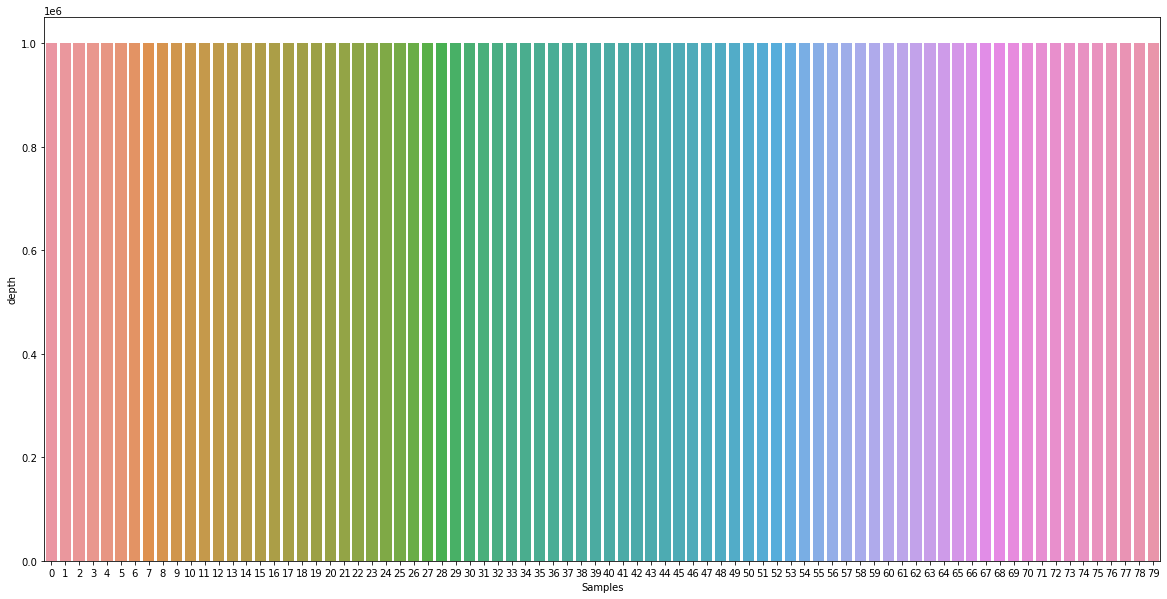

In [9]:
depth = pd.DataFrame({'Samples':list(range(0,80)), 'depth':transcriptomics.sum()})
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [10]:
X = transcriptomics.T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] = dict_sample.values()


fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [11]:
transcriptomics_transf = np.log2(1+transcriptomics)
transcriptomics_transf

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,3.0,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,4.0,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,0.0,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,0.0,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [12]:
X = transcriptomics_transf.T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()

fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

Transformed data has better cluster

### 2. Differential gene expression

In [13]:
de_results = pd.DataFrame(index = transcriptomics.index, columns = ["pval","fdr","log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

In [14]:
pvalue=[]
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

for index, gene in transcriptomics_transf.iterrows():
    _, pval = ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples], equal_var=False)
    # _, pval =(ttest_ind(gene[0:40], gene[40:80], equal_var=False))
    pvalue.append(pval)
de_results["pval"] = pvalue

t_f, fdr_corrected_p_values = fdrcorrection(de_results.pval)
de_results.fdr = fdr_corrected_p_values

2.c)

In [15]:
de_results[de_results["fdr"] >= 0.05]

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000000003,0.029213,0.124449,NaN,NaN,NaN
ENSG00000000419,0.436098,0.605981,NaN,NaN,NaN
ENSG00000000457,0.371879,0.541478,NaN,NaN,NaN
ENSG00000000460,0.403271,0.574002,NaN,NaN,NaN
ENSG00000001167,0.032582,0.135853,NaN,NaN,NaN
...,...,...,...,...,...
ENSG00000273483,1.000000,1.000000,NaN,NaN,NaN
ENSG00000273485,0.767912,0.863298,NaN,NaN,NaN
ENSG00000273486,0.104262,0.314575,NaN,NaN,NaN


##### 2.d)

In [16]:
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

de_results["log2_mean_preadipo"] = np.log2(transcriptomics[PreAdipo_samples].mean(axis=1)+1)
de_results["log2_mean_adipo"] = np.log2(transcriptomics[Adipo_samples].mean(axis=1)+1)

##### 2.e)

In [18]:
de_results["log2_fold_change"] = (de_results["log2_mean_adipo"] - de_results["log2_mean_preadipo"])
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449
...,...,...,...,...,...
ENSG00000089685,2.943092e-11,1.105506e-09,5.984703,3.083213,-2.901490
ENSG00000117399,2.514095e-07,4.778202e-06,4.842979,1.877744,-2.965235
ENSG00000149968,3.987162e-15,2.638158e-13,4.836682,1.827819,-3.008863


#### 2.f)

In [19]:
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results = de_results[de_results["fdr"] < 0.05]
de_results = de_results[de_results["log2_fold_change"] > 1]
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449
...,...,...,...,...,...
ENSG00000099785,2.521863e-09,7.002395e-08,4.346957,5.350497,1.003540
ENSG00000187824,1.747159e-07,3.423888e-06,3.617651,4.620586,1.002935
ENSG00000100412,8.848764e-08,1.817724e-06,4.499846,5.500643,1.000797



## 3. Investigating top marker genes
#### 3.a)

In [21]:
gene_annotation = pd.read_csv( os.path.join(core_path, 'Homo_sapiens.GRCh37.75.gene_annotation.txt'),sep= "\t")
gene_annotation.index = gene_annotation.Ensembl
gene_annotation2 = gene_annotation.loc[de_results.index,:]
de_results["gene_symbol"] = gene_annotation2.Name
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene_symbol
Gene_ID,,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889,FABP4
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695,APOC1
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271,ITIH1
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233,FAM213A
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449,PPP1R1A
...,...,...,...,...,...,...
ENSG00000099785,2.521863e-09,7.002395e-08,4.346957,5.350497,1.003540,MARCH2
ENSG00000187824,1.747159e-07,3.423888e-06,3.617651,4.620586,1.002935,TMEM220
ENSG00000100412,8.848764e-08,1.817724e-06,4.499846,5.500643,1.000797,ACO2


#### 3.b)

In [22]:
gene_annotation3 = gene_annotation.loc[transcriptomics.index,:]
transcriptomics_annotate = pd.concat([transcriptomics, gene_annotation3.Name], axis=1)
transcriptomics_annotate


,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo,Name
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,30,9,23,16,3,14,11,16,TSPAN6
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,1,29,2,22,3,0,2,0,5,TNMD
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,9,9,15,8,9,9,4,16,5,DPM1
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,8,8,5,6,0,12,13,4,11,SCYL3
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,3,0,1,0,1,4,0,10,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,12,0,0,0,0,RP11-225H22.7
ENSG00000273486,0,0,0,0,1,0,0,0,0,0,...,2,0,3,0,2,5,1,0,0,RP11-731C17.2
ENSG00000273487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RP4-621B10.8


In [23]:
pca_output_log_df["top_marker_gene_expression"] = np.array(transcriptomics.loc['ENSG00000170323'])
pca_output_log_df["top_marker_gene_expression"] = pca_output_log_df["top_marker_gene_expression"].astype(float)

In [24]:
def top_marker_gene_plot (df, column_name, Ensembl_name, Gene_symbol):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Expression of the top marker gene " + Ensembl_name + " of gene symbol " +Gene_symbol )

    #ax1 = ax1.axes(projection ="3d")
    ax1 = fig.add_subplot(2, 2, 2, projection='3d')
    ax1.scatter3D(df['PCA1'], df['PCA2'], df['PCA3'], c =df[column_name])#, cmap=cmap)

    ax2 = fig.add_subplot(2, 2, 1)
    ax2 = sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df[column_name] , cmap=cmap)
    fig.show()


<ipython-input-24-9d2ca4949a6c>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



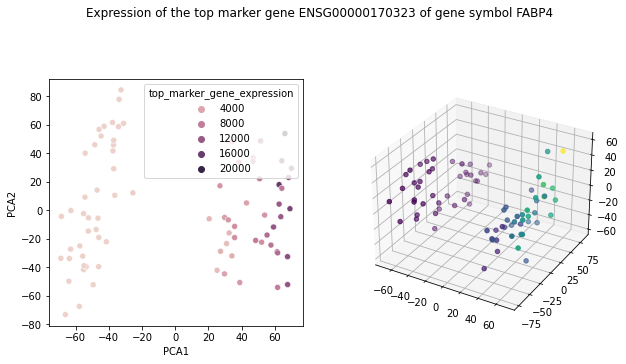

In [27]:
name = transcriptomics_annotate.loc["ENSG00000170323"].Name
cmap= sns.color_palette("rocket", as_cmap=True)
top_marker_gene_plot(pca_output_log_df,"top_marker_gene_expression", "ENSG00000170323", name)

3.d

In [51]:
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

up_down_reg = pd.DataFrame(index = transcriptomics.index, columns = ["log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

up_down_reg["log2_mean_preadipo"] = np.log2(transcriptomics[PreAdipo_samples].mean(axis=1)+1)
up_down_reg["log2_mean_adipo"] = np.log2(transcriptomics[Adipo_samples].mean(axis=1)+1)
up_down_reg["log2_fold_change"] = (up_down_reg["log2_mean_adipo"] - up_down_reg["log2_mean_preadipo"])
up_reg = up_down_reg.sort_values('log2_fold_change', ascending=False).iloc[:20]
down_reg = up_down_reg.sort_values('log2_fold_change', ascending=True).iloc[:20]


In [81]:
up_reg.index#["Gene_ID"]

Index(['ENSG00000170323', 'ENSG00000130208', 'ENSG00000055957',
       'ENSG00000122378', 'ENSG00000135447', 'ENSG00000181856',
       'ENSG00000175445', 'ENSG00000103723', 'ENSG00000123689',
       'ENSG00000167588', 'ENSG00000091513', 'ENSG00000131471',
       'ENSG00000170262', 'ENSG00000181092', 'ENSG00000064886',
       'ENSG00000130203', 'ENSG00000187288', 'ENSG00000138207',
       'ENSG00000174697', 'ENSG00000166819'],
      dtype='object', name='Gene_ID')

In [83]:
preadipo = transcriptomics[PreAdipo_samples].T
preadipo['label'] = 40*['PreAdipo']
adipo = transcriptomics[Adipo_samples].T[up_reg.index + down_reg.index]
adipo['label'] = 40*['Adipo']
cluster_df = pd.concat([preadipo, adipo], axis = 1, )
cluster_df

KeyError: "None of [Index(['ENSG00000170323ENSG00000214100', 'ENSG00000130208ENSG00000264433',\n       'ENSG00000055957ENSG00000149968', 'ENSG00000122378ENSG00000117399',\n       'ENSG00000135447ENSG00000089685', 'ENSG00000181856ENSG00000196611',\n       'ENSG00000175445ENSG00000115884', 'ENSG00000103723ENSG00000166803',\n       'ENSG00000123689ENSG00000186193', 'ENSG00000167588ENSG00000205362',\n       'ENSG00000091513ENSG00000250038', 'ENSG00000131471ENSG00000079462',\n       'ENSG00000170262ENSG00000114270', 'ENSG00000181092ENSG00000158270',\n       'ENSG00000064886ENSG00000109881', 'ENSG00000130203ENSG00000188064',\n       'ENSG00000187288ENSG00000135451', 'ENSG00000138207ENSG00000148773',\n       'ENSG00000174697ENSG00000163739', 'ENSG00000166819ENSG00000150551'],\n      dtype='object', name='Gene_ID')] are in the [columns]"

In [70]:
adipo

Gene_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000273477,ENSG00000273478,ENSG00000273481,ENSG00000273483,ENSG00000273485,ENSG00000273486,ENSG00000273487,ENSG00000273489,ENSG00000273493,label
Sample_44_adipo,28,9,19,0,0,0,2,15,0,1,...,0,0,0,0,0,1,0,0,0,Adipo
Sample_68_adipo,8,0,10,12,0,3,13,27,2,5,...,0,0,0,0,15,5,0,0,0,Adipo
Sample_74_adipo,9,2,15,5,0,15,16,48,0,0,...,2,0,0,0,0,3,0,0,0,Adipo
Sample_54_adipo,13,1,5,11,1,6,12,30,0,2,...,2,0,0,0,0,0,0,0,0,Adipo
Sample_67_adipo,22,9,6,3,0,10,2,29,8,0,...,5,0,0,0,0,2,0,0,1,Adipo
Sample_46_adipo,19,0,32,14,0,0,4,63,0,1,...,0,2,0,0,0,0,0,0,0,Adipo
Sample_61_adipo,10,0,4,1,6,6,12,37,2,1,...,3,0,0,0,0,3,0,0,0,Adipo
Sample_72_adipo,9,1,9,8,0,9,11,47,7,8,...,1,0,0,0,0,2,0,0,0,Adipo
Sample_45_adipo,34,1,19,0,0,0,3,55,0,1,...,0,0,0,0,0,0,0,0,0,Adipo
Sample_76_adipo,16,3,9,0,0,8,15,31,0,4,...,0,4,0,0,12,2,0,0,0,Adipo


In [ ]:
sns.clustermap(iris, figsize=(7, 5), row_cluster=False, dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4))